<a href="https://colab.research.google.com/github/Himanshu033/TensorFlow-Course/blob/master/Handwritten_Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline


In [9]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [10]:
len(X_train)

60000

In [11]:
len(X_test)

10000

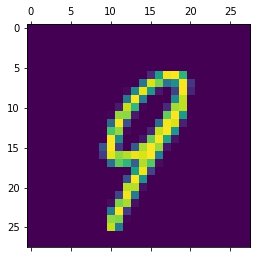

In [12]:
plt.matshow(X_train[22])

In [14]:
Y_train[22]

9

In [26]:
X_train = X_train/255
X_test = X_test/255

In [27]:
X_train_flatten = X_train.reshape(len(X_train),28*28)

In [28]:
X_train_flatten.shape

(60000, 784)

In [29]:
X_test_flatten = X_test.reshape(len(X_test),28*28)
X_test_flatten.shape

(10000, 784)

In [30]:
# a neural network 
model = keras.Sequential([
                  keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']

              )
model.fit(X_train_flatten,Y_train,epochs = 7)
#epochs is the number of times the model is going to be trained

Epoch 1/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4701 - accuracy: 0.8765
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.9150
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9209
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9232
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9256
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2617 - accuracy: 0.9276
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9290


In [31]:
model.evaluate(X_test_flatten,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2659 - accuracy: 0.9239


[0.2659330368041992, 0.9239000082015991]

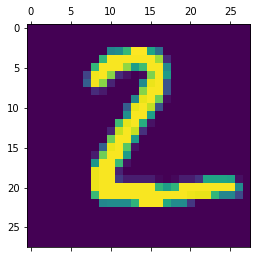

In [38]:
plt.matshow(X_test[1])

In [34]:
y_predicted = model.predict(X_test_flatten)

In [37]:
y_predicted[1]

array([4.9688488e-01, 5.1600933e-03, 9.9940538e-01, 2.5120515e-01,
       1.3660882e-10, 8.9018142e-01, 9.2099345e-01, 5.4802957e-14,
       1.3653585e-01, 1.4100253e-10], dtype=float32)

In [39]:
np.argmax(y_predicted[1])

2

In [41]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [44]:
# Confusion Matirx 
cm = tf.math.confusion_matrix(labels = Y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    2,    1,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   8,   12,  903,   24,   10,    4,   13,   13,   41,    4],
       [   4,    0,   14,  930,    1,   20,    3,    9,   19,   10],
       [   1,    1,    5,    2,  919,    0,    8,    4,    9,   33],
       [  11,    3,    1,   35,   10,  775,   15,    9,   27,    6],
       [  12,    3,    3,    2,    7,   15,  912,    2,    2,    0],
       [   1,    7,   19,    7,    9,    1,    0,  943,    2,   39],
       [  10,    9,    5,   23,    9,   26,    9,   10,  858,   15],
       [  11,    8,    1,   11,   25,    6,    0,   18,    4,  925]],
      dtype=int32)>

In [48]:
model = keras.Sequential([
                 keras.layers.Flatten(input_shape = (28,28)),
                 keras.layers.Dense(1000,activation = 'relu'),
                 keras.layers.Dense(10,activation = 'sigmoid')

])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']

              )
model.fit(X_train,Y_train,epochs = 14)

Epoch 1/14
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1861 - accuracy: 0.9447
Epoch 2/14
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0748 - accuracy: 0.9767
Epoch 3/14
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0479 - accuracy: 0.9848
Epoch 4/14
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0342 - accuracy: 0.9888
Epoch 5/14
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0247 - accuracy: 0.9917
Epoch 6/14
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0205 - accuracy: 0.9930
Epoch 7/14
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0174 - accuracy: 0.9945
Epoch 8/14
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0142 - accuracy: 0.9951
Epoch 9/14
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0141 - accuracy: 0.9955
Epoch 10/14
1875/1875 [==============================] - 12s 6ms/step - l

Text(69.0, 0.5, 'Truth')

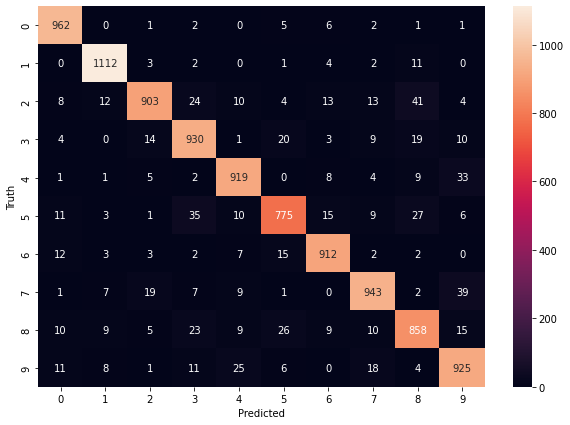

In [49]:
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')